<a href="https://colab.research.google.com/github/gyujin0450/RPRG_PARTIII/blob/main/p368_%EC%B2%99%EB%8F%84%EB%B3%84%EA%B8%B0%EC%88%A0%ED%86%B5%EA%B3%84%EB%9F%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ch11. 척도별 기술통계량 구하기

In [ ]:
raw_data <- read.csv("https://raw.githubusercontent.com/gyujin0450/RPRG_PARTIII/main/data03/descriptive.csv", header = T)
data <- raw_data

In [ ]:
head(data)

,resident,gender,age,level,cost,type,survey,pass
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,1,1,50,1,5.1,1,1,2
2,2,1,54,2,4.2,1,2,2
3,NA,1,62,2,4.7,1,1,1
4,4,2,50,NA,3.5,1,4,1
5,5,1,51,1,5.0,1,3,1
6,3,1,55,2,5.4,1,3,NA


In [ ]:
str(data)

'data.frame':	300 obs. of  8 variables:
 $ resident: int  1 2 NA 4 5 3 2 5 NA 2 ...
 $ gender  : int  1 1 1 2 1 1 2 1 1 1 ...
 $ age     : int  50 54 62 50 51 55 56 49 49 49 ...
 $ level   : int  1 2 2 NA 1 2 1 2 1 2 ...
 $ cost    : num  5.1 4.2 4.7 3.5 5 5.4 4.1 675 4.4 4.9 ...
 $ type    : int  1 1 1 1 1 1 1 NA 1 1 ...
 $ survey  : int  1 2 1 4 3 3 NA NA NA 1 ...
 $ pass    : int  2 2 1 1 1 NA 2 2 2 1 ...


In [ ]:
# resident : 거주지역(명목척도)
# gender : 성별(명목척도)
# age : 나이(비율척도)
# level : 학력수준(서열척도)
# cost : 생활비(비율척도)
# type : 학교유형(명목척도)
# survey : 만족도(등간척도)
# pass : 합격여부(명목척도)

In [ ]:
summary(data)

    resident         gender          age            level      
 Min.   :1.000   Min.   :0.00   Min.   :40.00   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.00   1st Qu.:48.00   1st Qu.:1.000  
 Median :2.000   Median :1.00   Median :53.00   Median :2.000  
 Mean   :2.233   Mean   :1.42   Mean   :53.88   Mean   :1.836  
 3rd Qu.:3.000   3rd Qu.:2.00   3rd Qu.:60.00   3rd Qu.:2.000  
 Max.   :5.000   Max.   :5.00   Max.   :69.00   Max.   :3.000  
 NA's   :21                                     NA's   :13     
      cost               type          survey          pass      
 Min.   :-457.200   Min.   :1.00   Min.   :1.00   Min.   :1.000  
 1st Qu.:   4.425   1st Qu.:1.00   1st Qu.:2.00   1st Qu.:1.000  
 Median :   5.400   Median :1.00   Median :3.00   Median :1.000  
 Mean   :   8.752   Mean   :1.27   Mean   :2.61   Mean   :1.432  
 3rd Qu.:   6.300   3rd Qu.:2.00   3rd Qu.:3.00   3rd Qu.:2.000  
 Max.   : 675.000   Max.   :2.00   Max.   :5.00   Max.   :2.000  
 NA's   :30         NA's  

2.1 명목척도 기술통계량

In [ ]:
table(data$gender)


  0   1   2   5 
  2 173 124   1 

In [ ]:
# 이상치 제거 : 결측 처리 --> data 손실 X
data$gender <- ifelse(data$gender == 0 | data$gender == 5, NA, data$gender) # dim(data) = 300 * 8 
# 이상치 제거 : 정상치제외 --> dataㅅ곤상
# data <- subset(data, gender == 1 | gender ==2) # dim(data) = 297*8

In [ ]:
table(data$gender)


  1   2 
173 124 

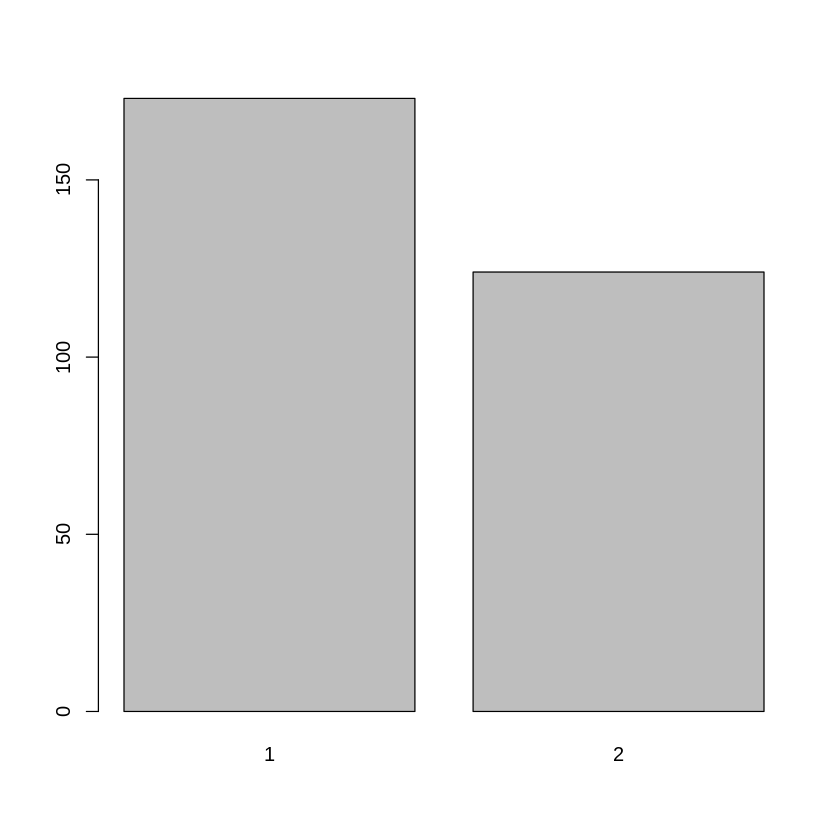

In [ ]:
x <- table(data$gender)
barplot(x)

In [ ]:
# 구성비율 계산
round(prop.table(x)*100,2)


    1     2 
58.25 41.75 

2.2 서열척도 기술통계량

In [ ]:
table(data$level)


  1   2   3 
117 100  70 

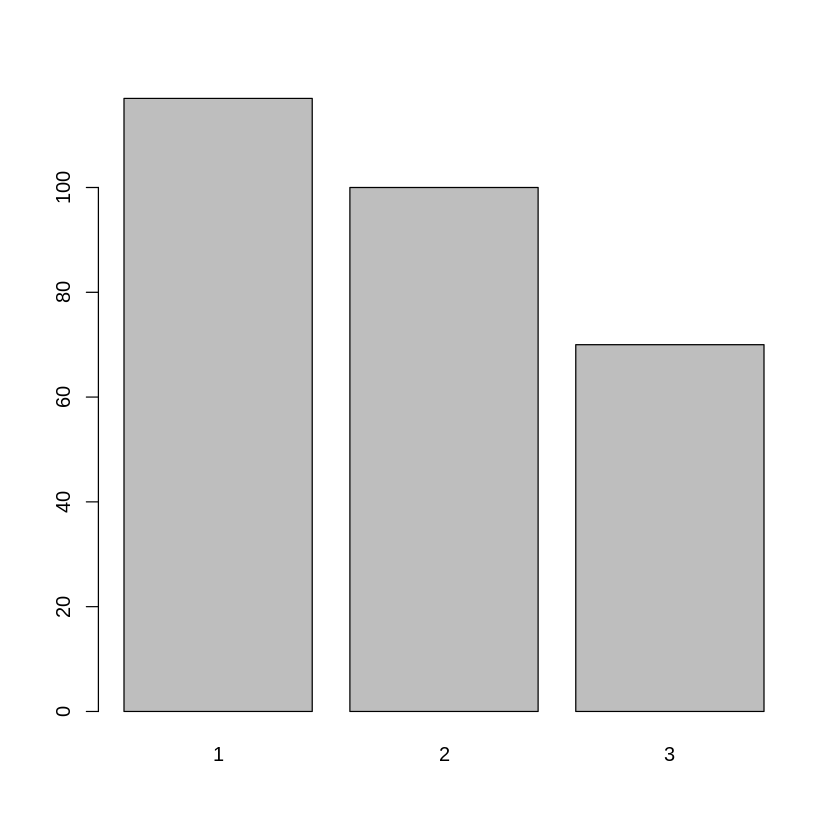

In [ ]:
y <- table(data$level)
barplot(y) # 명목/서열척도 -> 막대차트

2.3 등간척도 기술통계량

In [ ]:
survay <- data$survey

In [ ]:
length(survay)

[1] 300

In [ ]:
summary(survay)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00    2.00    3.00    2.61    3.00    5.00     113 

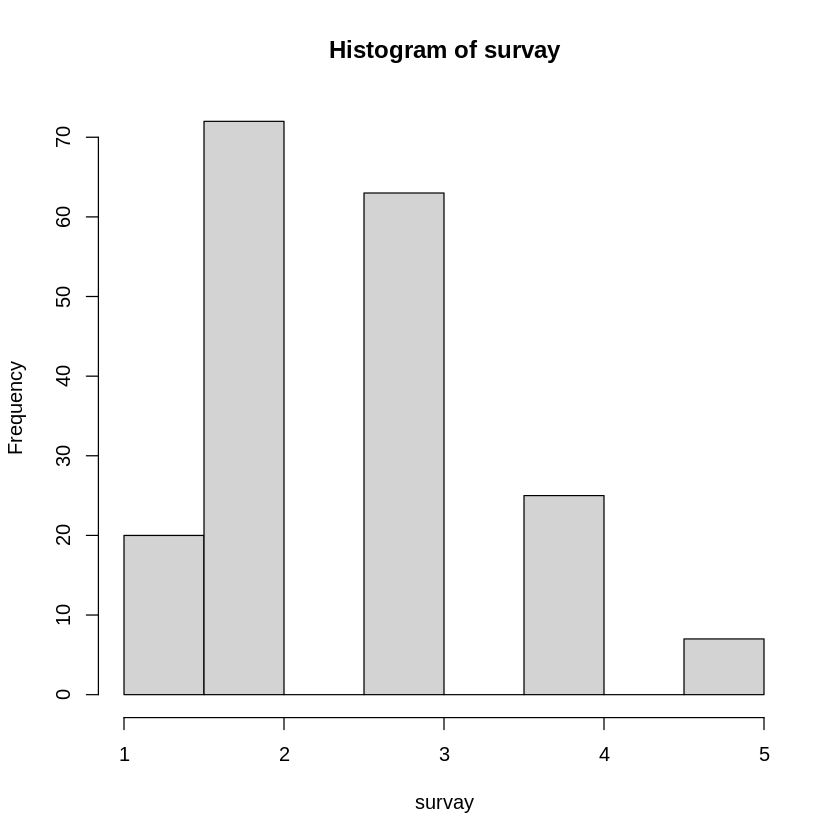

In [ ]:
hist(survay)

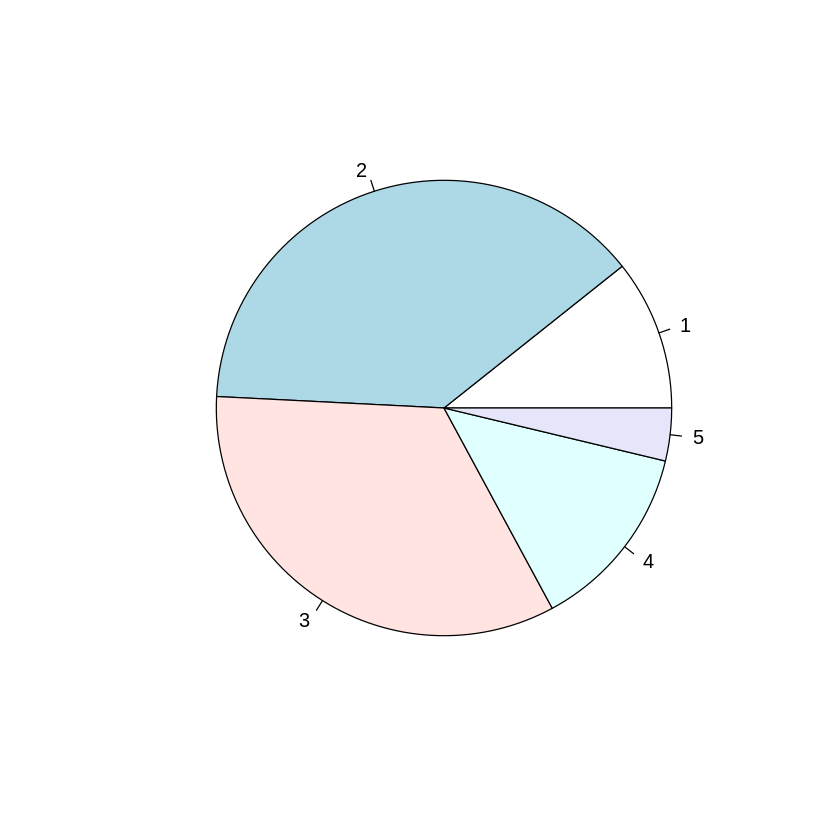

In [ ]:
x <- table(survay)
pie(x)

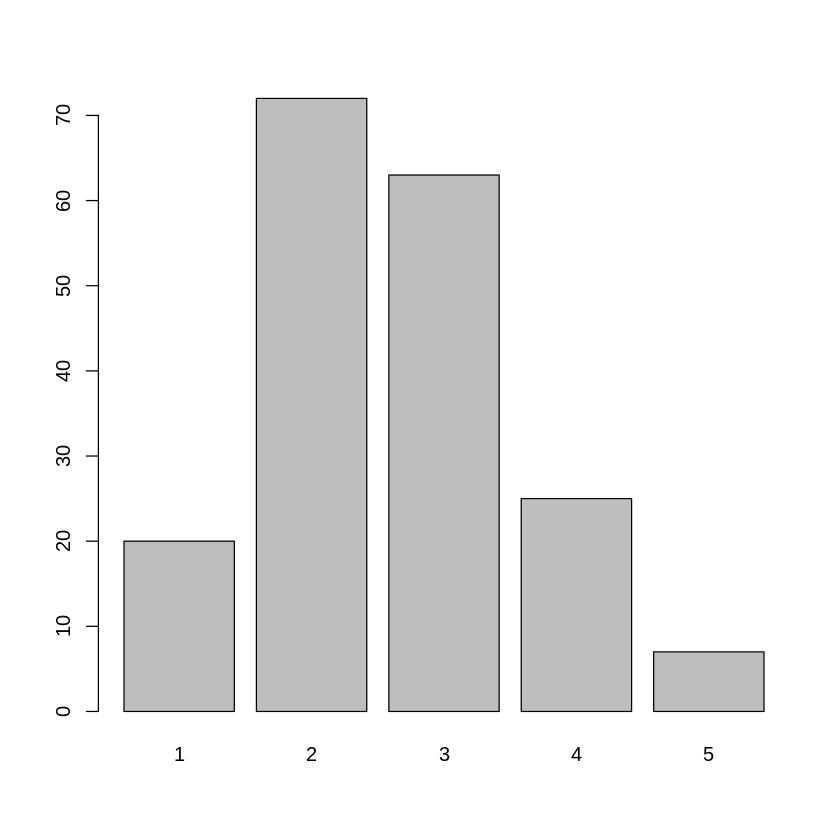

In [ ]:
barplot(x)

In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 113 rows containing non-finite values (stat_bin).”


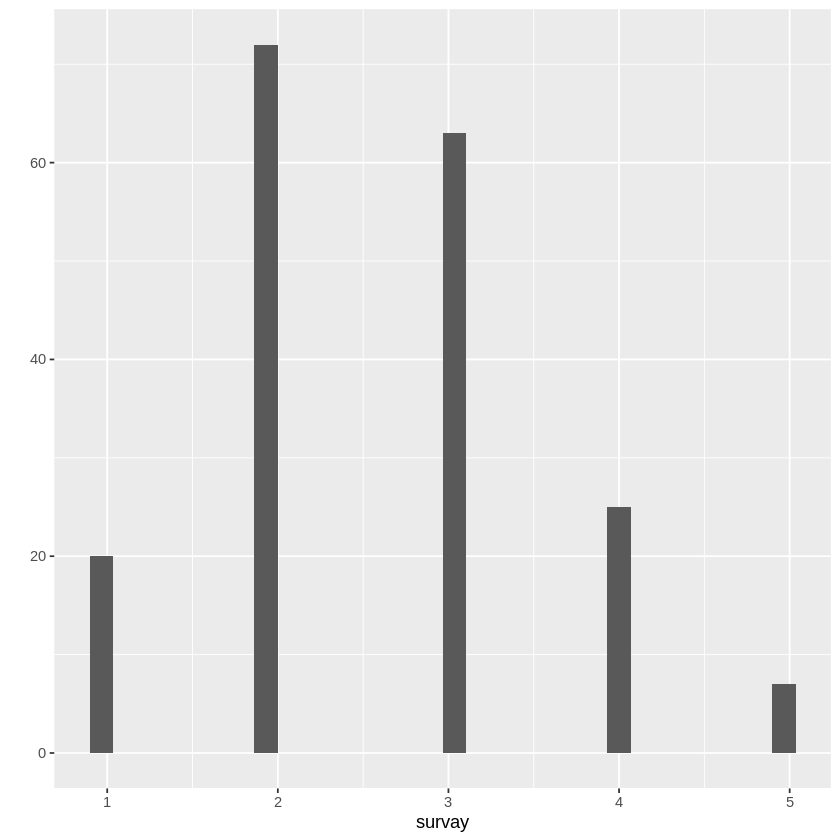

In [ ]:
qplot(survay)

2.4 비율척도 기술통계량

In [ ]:
summary(data$cost) # 요양통계량

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
-457.200    4.425    5.400    8.752    6.300  675.000       30 

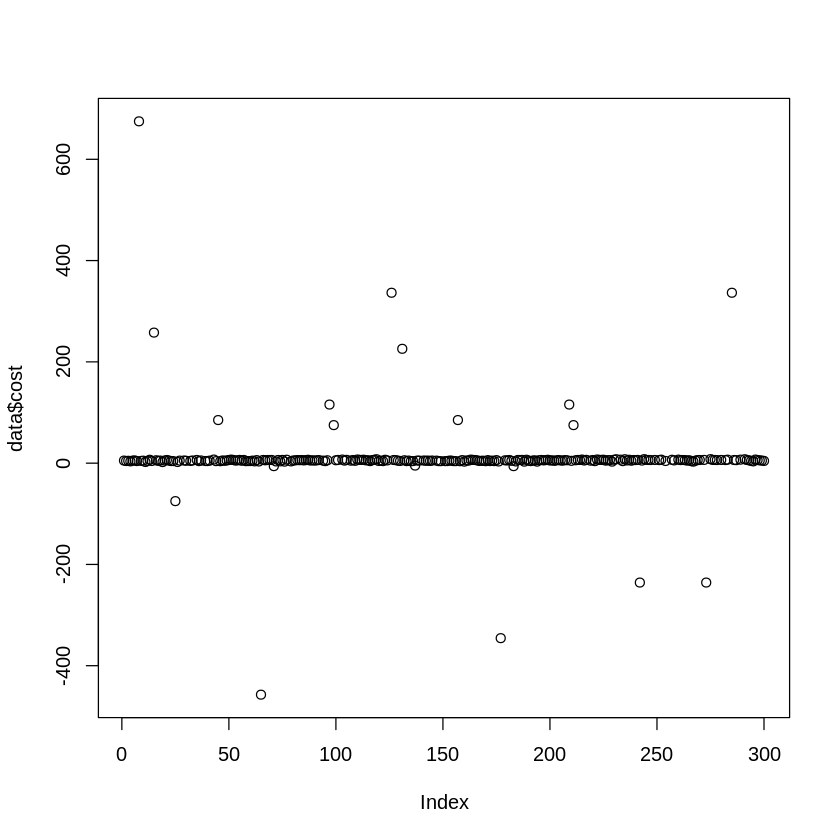

In [ ]:
plot(data$cost)

In [ ]:
# 결측치(NA) 및 이상치 제외한 정상 범위 데이터 만들기
x <- subset(data$cost, data$cost >= 2 & data$cost <= 10)

In [ ]:
length(x) # 전체 300개 중 49개 데이터 제거

[1] 251

In [ ]:
summary(x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.100   4.600   5.400   5.361   6.200   7.900 

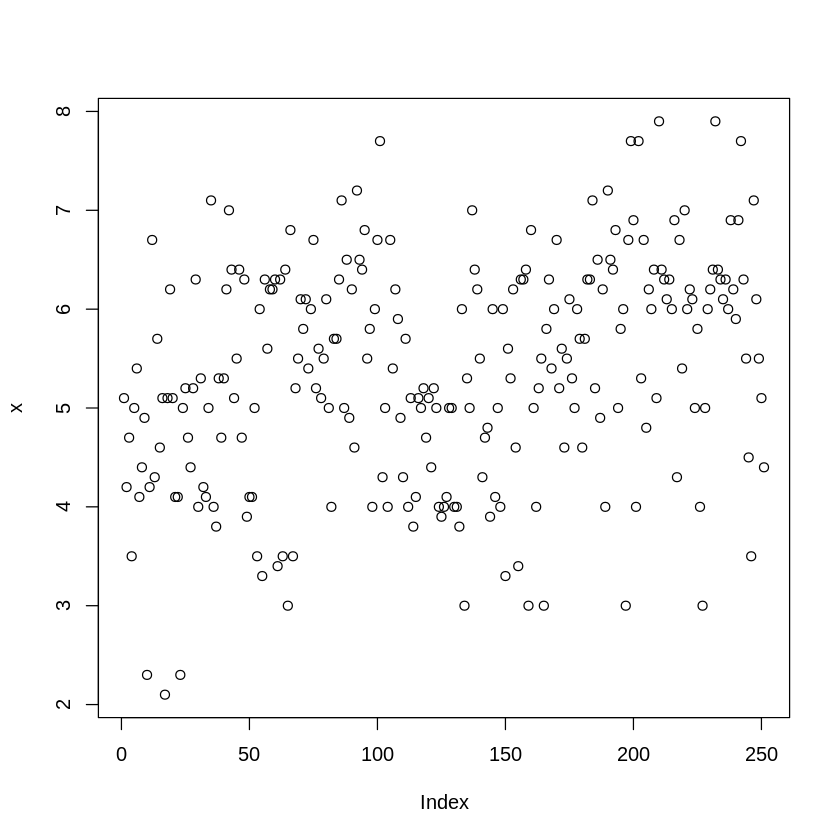

In [ ]:
plot(x)

(1) 대표값 구하기

In [ ]:
mean(x)

[1] 5.360558

In [ ]:
median(x)

[1] 5.4

In [ ]:
sort(x)

[1] 2.1 2.3 2.3 3.0 3.0 3.0 3.0 3.0 3.0 3.3 3.3 3.4 3.4 3.5 3.5 3.5 3.5 3.5
 [19] 3.8 3.8 3.8 3.9 3.9 3.9 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0
 [37] 4.0 4.0 4.0 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.2 4.2 4.2 4.3 4.3 4.3
 [55] 4.3 4.3 4.4 4.4 4.4 4.4 4.5 4.6 4.6 4.6 4.6 4.6 4.7 4.7 4.7 4.7 4.7 4.7
 [73] 4.8 4.8 4.9 4.9 4.9 4.9 5.0 5.0 5.0 5.0 5.0 5.0 5.0 5.0 5.0 5.0 5.0 5.0
 [91] 5.0 5.0 5.0 5.0 5.0 5.0 5.1 5.1 5.1 5.1 5.1 5.1 5.1 5.1 5.1 5.1 5.1 5.2
[109] 5.2 5.2 5.2 5.2 5.2 5.2 5.2 5.2 5.3 5.3 5.3 5.3 5.3 5.3 5.3 5.4 5.4 5.4
[127] 5.4 5.4 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.6 5.6 5.6 5.6 5.7 5.7 5.7
[145] 5.7 5.7 5.7 5.8 5.8 5.8 5.8 5.8 5.9 5.9 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0
[163] 6.0 6.0 6.0 6.0 6.0 6.0 6.1 6.1 6.1 6.1 6.1 6.1 6.1 6.1 6.2 6.2 6.2 6.2
[181] 6.2 6.2 6.2 6.2 6.2 6.2 6.2 6.2 6.2 6.3 6.3 6.3 6.3 6.3 6.3 6.3 6.3 6.3
[199] 6.3 6.3 6.3 6.3 6.3 6.3 6.3 6.4 6.4 6.4 6.4 6.4 6.4 6.4 6.4 6.4 6.4 6.4
[217] 6.5 6.5 6.5 6.5 6.7 6.7 6.7 6.7 6.7 6.7 6.7 6.7 6.8 6.8 6.8 6.8 6.9 6.9
[235] 6.9 6.9 7.0 7.0 7.0 7.1 7.1 7.1 7.1 7.2 7.2 7.7 7.7 7.7 7.7 7.9 7.9

In [ ]:
sort(x, decreasing = T)

[1] 7.9 7.9 7.7 7.7 7.7 7.7 7.2 7.2 7.1 7.1 7.1 7.1 7.0 7.0 7.0 6.9 6.9 6.9
 [19] 6.9 6.8 6.8 6.8 6.8 6.7 6.7 6.7 6.7 6.7 6.7 6.7 6.7 6.5 6.5 6.5 6.5 6.4
 [37] 6.4 6.4 6.4 6.4 6.4 6.4 6.4 6.4 6.4 6.4 6.3 6.3 6.3 6.3 6.3 6.3 6.3 6.3
 [55] 6.3 6.3 6.3 6.3 6.3 6.3 6.3 6.3 6.2 6.2 6.2 6.2 6.2 6.2 6.2 6.2 6.2 6.2
 [73] 6.2 6.2 6.2 6.1 6.1 6.1 6.1 6.1 6.1 6.1 6.1 6.0 6.0 6.0 6.0 6.0 6.0 6.0
 [91] 6.0 6.0 6.0 6.0 6.0 6.0 6.0 5.9 5.9 5.8 5.8 5.8 5.8 5.8 5.7 5.7 5.7 5.7
[109] 5.7 5.7 5.6 5.6 5.6 5.6 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.4 5.4 5.4
[127] 5.4 5.4 5.3 5.3 5.3 5.3 5.3 5.3 5.3 5.2 5.2 5.2 5.2 5.2 5.2 5.2 5.2 5.2
[145] 5.1 5.1 5.1 5.1 5.1 5.1 5.1 5.1 5.1 5.1 5.1 5.0 5.0 5.0 5.0 5.0 5.0 5.0
[163] 5.0 5.0 5.0 5.0 5.0 5.0 5.0 5.0 5.0 5.0 5.0 4.9 4.9 4.9 4.9 4.8 4.8 4.7
[181] 4.7 4.7 4.7 4.7 4.7 4.6 4.6 4.6 4.6 4.6 4.5 4.4 4.4 4.4 4.4 4.3 4.3 4.3
[199] 4.3 4.3 4.2 4.2 4.2 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.0 4.0 4.0 4.0
[217] 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 3.9 3.9 3.9 3.8 3.8 3.8 3.5
[235] 3.5 3.5 3.5 3.5 3.4 3.4 3.3 3.3 3.0 3.0 3.0 3.0 3.0 3.0 2.3 2.3 2.1

In [ ]:
# 사분위수 구하기
quantile(x,1/4)

25% 
4.6

In [ ]:
quantile(x,2/4) # median과 같음

50% 
5.4

In [ ]:
quantile(x,3/4)

75% 
6.2

In [ ]:
quantile(x,4/4) # 이상치가 있을경우, Max와 같지 않을수 있음

100% 
 7.9

(실습) 생활비 변수의 최빈치 구하기



In [ ]:
# 1) 최빈수는 빈도수가 가장 많은 변량을 의미
length(x)
x.cnt <- table(x)
max(x.cnt)

[1] 251

[1] 18

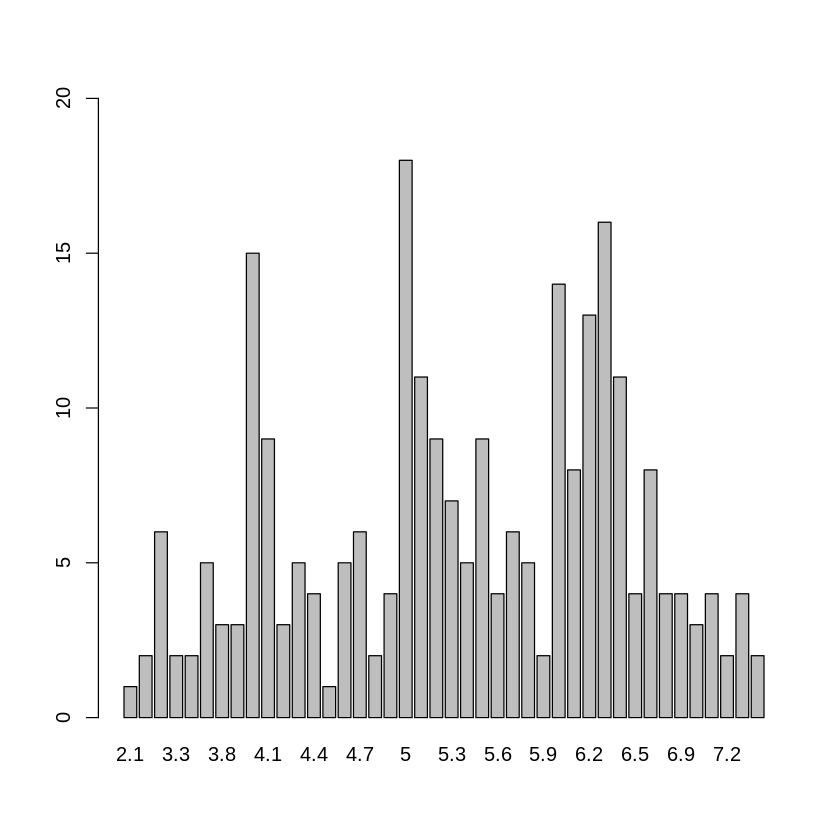

In [ ]:
barplot(x.cnt,ylim = c(0,20))

In [ ]:
# 2) 두개의 행을 묶어서 matrix 생성
x.m <- rbind(x.cnt) # 1행은 x의 변량, 2행은 빈도수
class(x.m)

[1] "matrix" "array"

In [ ]:
str(x.m)

 int [1, 1:42] 1 2 6 2 2 5 3 3 15 9 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr "x.cnt"
  ..$ : chr [1:42] "2.1" "2.3" "3" "3.3" ...


In [ ]:
which(x.m[1,] == 18) # 최빈값 18의 위치, 19(?)

5 
19

In [ ]:
x.m[1,c(1:19)]

2.1 2.3   3 3.3 3.4 3.5 3.8 3.9   4 4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9   5 
  1   2   6   2   2   5   3   3  15   9   3   5   4   1   5   6   2   4  18

In [ ]:
# 3) 데이터프레임으로 변경
x.df <- as.data.frame(x.m)
which(x.df[1,] == 18)

[1] 19

In [ ]:
# 4) 최빈수와 변량 확인
x.df[1:19]

,2.1,2.3,3,3.3,3.4,3.5,3.8,3.9,4,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
x.cnt,1,2,6,2,2,5,3,3,15,9,3,5,4,1,5,6,2,4,18


In [ ]:
attributes(x.df) # 속성보기 : $names, $class, $row.names

$names
 [1] "2.1" "2.3" "3"   "3.3" "3.4" "3.5" "3.8" "3.9" "4"   "4.1" "4.2" "4.3"
[13] "4.4" "4.5" "4.6" "4.7" "4.8" "4.9" "5"   "5.1" "5.2" "5.3" "5.4" "5.5"
[25] "5.6" "5.7" "5.8" "5.9" "6"   "6.1" "6.2" "6.3" "6.4" "6.5" "6.7" "6.8"
[37] "6.9" "7"   "7.1" "7.2" "7.7" "7.9"

$class
[1] "data.frame"

$row.names
[1] "x.cnt"

In [ ]:
names(x.df[19])

[1] "5"

(2) 산포도 구하기 - 분산(var), 표준편차(sd)
- 분산 = 1/N*sum((관측치-모평균)^2)
- 표준편차 = sqrt(분산)


	Shapiro-Wilk normality test

data:  x
W = 0.98249, p-value = 0.003501


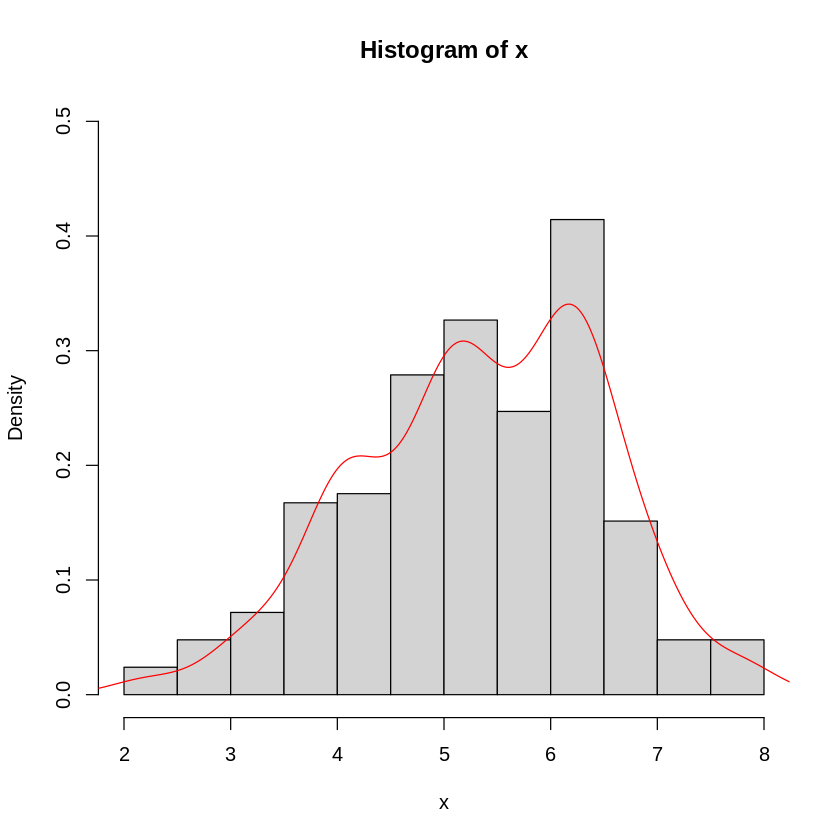

In [ ]:
hist(x,probability = T, ylim=c(0,0.5))
lines(density(x), col='red')
shapiro.test(x) # p-value < 0.05 므로 정규성이 없음

* 생활비(cost) 변수를 대상으로 산포도 구하기

In [ ]:
cat("분산 var(x) : ",var(x), "\n")
cat("표준편차 sd(x) : ",sd(x), "\n")
cat("표준편차 = sqrt(분산) : ", sqrt(var(data$cost, na.rm = T)), "<이상치가 포함됨>") 

분산 var(x) :  1.293758 
표준편차 sd(x) :  1.137435 
표준편차 = sqrt(분산) :  69.09727 <이상치가 포함됨>

(3) 표본분산과 표본표준편차
- 표본분산 = 1/(n-1)*sum((관측치 - 평균)^2)
- 표본표준편차 = sqrt(표준분산)
* 변동계수 = 표준편차 / 평균

In [22]:
a = c(10,20,30,40,50)
b = c(1,2,3,4,5)

In [25]:
# a 의 분산, 표준편차, 변동계수
cat('a : ',a,'\n')
cat('평균 : ',mean(a),'\n')
cat('표본분산 : ',var(a),'\n') # 분산 함수는?  
cat('표본표준편차 : ',sd(a),'\n') # 표준편차 함수는?
cat('변동계수 : ',sd(a)/mean(a),'\n')

a :  10 20 30 40 50 
평균 :  30 
표본분산 :  250 
표본표준편차 :  15.81139 
변동계수 :  0.5270463 


In [23]:
# a 의 분산, 표준편차, 변동계수
cat('분산 : ',var(b),'\n')
cat('표준편차 : ',sd(b),'\n') # 수계산과 결과가 다름
cat('변동계수 : ',sd(b)/mean(b),'\n')

분산 :  2.5 
표준편차 :  1.581139 
변동계수 :  0.5270463 
